<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/2nd_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade -q gspread
!pip install gspread-dataframe

These requirements should normally be satisfied, they are dependencies for gspread to pull the dataframe

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

from sklearn.linear_model import LinearRegression

Import necessary libraries to create dataframe, regression, and formatting of regression (plotting) Gspread creates dataframe from sheets file

In [ ]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

This will create authorization through google sheets (follow link that appears and copy authorization code)

In [ ]:
sheet1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Ykc1dzrK3L1ZHPj8y9LeK6VjWo918ZCmmAh2aYvyMM4/edit#gid=0')

sheet1 is entire csv file URL is sheets file URL

In [ ]:
ws = sheet1.worksheet('Houses')

This is the tab in csv file

In [ ]:
data = get_as_dataframe(ws)

titles the dataframe extracted from sheets file

In [ ]:
data

,price,size,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,154282.1,479.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,168047.3,525.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,171795.2,549.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,175716.5,620.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180307.2,681.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is calling the dataframe and representing from Pandas. NaN cells are empty values

In [ ]:
data.dropna(axis=0, how='all', inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=0 is rows how is any or all, inplace True removes from the dataframe

In [ ]:
data.dropna(axis=1, how='all', inplace=True)

dropna() is a methodfrom Pandas to remove NaN cells, axis=1 is columns how is any or all, inplace True removes from the dataframe

In [ ]:
data

,price,size
0,154282.1,479.75
1,168047.3,525.81
2,171795.2,549.69
3,175716.5,620.82
4,180307.2,681.07
...,...,...
95,444192.0,1300.96
96,454512.8,1496.36
97,458674.3,1275.46
98,494779.0,1842.51


calls the corrected dataframe

In [ ]:
x = data['size']
y = data['price']

sets the target (y) and feature (x)

In [ ]:
x_matrix = np.array(x).reshape(-1,1)

formats the 1 dimensional array of x to a matrix

In [ ]:
x_matrix.shape

(100, 1)

In [ ]:
reg = LinearRegression()

reg becomes a variable corresponding to the linearRegression function so it can be called as such

In [ ]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

copy_X indicates that it is a copy of x_matrix. Intercept (constant) is automatically calculated and can be analyzed.

In [ ]:
reg.score(x_matrix,y)

0.7447391062298374

R Squared (effectiveness of the prediction. 1 is max = 100%. Adjusted R squared is more indicative. Adding more, relevant variables will improve this.

In [ ]:
reg.coef_

array([223.17876459])

yhat = coef*x+intercept

In [ ]:
reg.intercept_

101912.57306422875

provides the constant of the regression

In [ ]:
reg.predict([[750]])

array([269296.64650949])

runs the prediction for the variable of 750 sq. ft provided. can also be added via Dataframe that is custom created. 

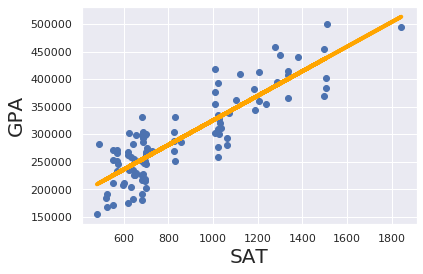

In [ ]:
plt.scatter(x, y)
yhat = reg.coef_*x_matrix +reg.intercept_
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()